<a href="https://colab.research.google.com/github/aman688/NLP/blob/main/job-a-thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [80]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [81]:
#train['Credit_Product'] = train['Credit_Product'].replace(['Yes','No'],[1,0])
#test['Credit_Product'] = test['Credit_Product'].replace(['Yes','No'],[1,0])

In [82]:
train_1 = train
test_1 = test

In [83]:
train.shape

(149567, 11)

In [85]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               1
Vintage                    1
Credit_Product         17798
Avg_Account_Balance        1
Is_Active                  1
Is_Lead                    1
dtype: int64

In [62]:
train.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,105312.000000
mean,43.871002,46.842819,1134194.631429
std,14.872890,32.273634,866242.989426
min,24.000000,7.000000,22597.000000
25%,30.000000,20.000000,603982.250000
50%,43.000000,32.000000,896634.500000
75%,54.000000,73.000000,1371598.250000
max,85.000000,135.000000,9908858.000000


In [413]:
train = train.replace(np.nan,'unknown')
test = test.replace(np.nan,'unknown')

In [414]:

train.head()


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


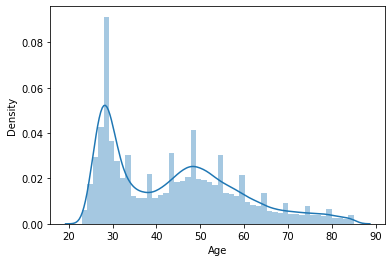

In [415]:
sns.distplot(train['Age'])

In [416]:
train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [417]:
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [418]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [419]:
train['Credit_Product'].value_counts()

No         144357
Yes         72043
unknown     29325
Name: Credit_Product, dtype: int64

In [420]:
#handling the missing valu


In [421]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [422]:
#train = train.bfill()
#test = test.bfill()

In [423]:
#train['Credit_Product'] = train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
#test['Credit_Product']=test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [424]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [425]:
cat_data_train = train.select_dtypes('O')
num_data_train = train.select_dtypes(np.number)

cat_data_test = test.select_dtypes('O')
num_data_test = test.select_dtypes(np.number)


cat_data_train.drop('ID',axis=1,inplace=True)
cat_data_test.drop('ID',axis=1,inplace=True)


In [426]:
dum_train = pd.get_dummies(cat_data_train,drop_first=True)
dum_test = pd.get_dummies(cat_data_test,drop_first=True)

dum_train.isnull().sum()

Gender_Male                 0
Region_Code_RG251           0
Region_Code_RG252           0
Region_Code_RG253           0
Region_Code_RG254           0
Region_Code_RG255           0
Region_Code_RG256           0
Region_Code_RG257           0
Region_Code_RG258           0
Region_Code_RG259           0
Region_Code_RG260           0
Region_Code_RG261           0
Region_Code_RG262           0
Region_Code_RG263           0
Region_Code_RG264           0
Region_Code_RG265           0
Region_Code_RG266           0
Region_Code_RG267           0
Region_Code_RG268           0
Region_Code_RG269           0
Region_Code_RG270           0
Region_Code_RG271           0
Region_Code_RG272           0
Region_Code_RG273           0
Region_Code_RG274           0
Region_Code_RG275           0
Region_Code_RG276           0
Region_Code_RG277           0
Region_Code_RG278           0
Region_Code_RG279           0
Region_Code_RG280           0
Region_Code_RG281           0
Region_Code_RG282           0
Region_Cod

In [427]:
train = pd.concat([num_data_train,dum_train],axis=1)

test_ = pd.concat([num_data_test,dum_test],axis=1)

train.shape,test_.shape

#train,test = train.align(test,join='inner',axis=1)

((245725, 48), (105312, 47))

In [428]:
X = train.drop(['Is_Lead'],axis=1)
y = train_1['Is_Lead']

X.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Credit_Product_unknown,Is_Active_Yes
0,73,43,1045696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,30,32,581988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,56,26,1484315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,34,19,470454,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,30,33,886787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)


In [430]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [431]:
LR.score(X_train,y_train)

0.7634296469630685

In [432]:
LR.score(X_test,y_test)

0.7602401058093398

In [434]:
y_predlr = LR.predict(test_)

In [435]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RF.score(X_train,y_train)

0.9999440431376538

In [436]:
RF.score(X_test,y_test)

0.8509716146098281

In [378]:
y_pred_rf = RF.predict(test_)

ValueError: ignored

In [437]:
from sklearn.ensemble import GradientBoostingClassifier


In [438]:
GBM = GradientBoostingClassifier()

GBM.fit(X_train,y_train)

GBM.score(X_train,y_train)

0.8606368908332486

In [439]:
GBM.score(X_test,y_test)


0.8586020958388443

In [440]:
import xgboost as xgb

In [441]:
model = xgb.XGBClassifier()

model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [442]:
model.score(X_train,y_train)

0.8605249771085564

In [443]:
model.score(X_test,y_test)

0.8589276630379489

In [233]:
model.

array([0, 1])

In [444]:
y_pred2 = model.predict(X_test)

In [445]:
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37362
           1       0.81      0.53      0.64     11783

    accuracy                           0.86     49145
   macro avg       0.84      0.75      0.78     49145
weighted avg       0.85      0.86      0.85     49145



In [447]:
confusion_matrix(y_test,y_pred2)

array([[35925,  1437],
       [ 5496,  6287]])

In [247]:
X_train,test_ =X_train.align(test_,join='inner',axis=1)

X_train.shape,test_.shape

((196580, 51), (105312, 51))

In [252]:
values = model.predict(test)

In [254]:
df = {'ID':test_1['ID'],'Is_Lead':values}

In [255]:
df = pd.DataFrame(df)
df.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [256]:
from google.colab import files

df.to_csv('submit.csv',index=0)
files.download('submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [240]:
test_ = test_.ffill()
test_.isnull().sum()

Age                         0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Gender_Female               0
Gender_Male                 0
Region_Code_RG250           0
Region_Code_RG251           0
Region_Code_RG252           0
Region_Code_RG253           0
Region_Code_RG254           0
Region_Code_RG255           0
Region_Code_RG256           0
Region_Code_RG257           0
Region_Code_RG258           0
Region_Code_RG259           0
Region_Code_RG260           0
Region_Code_RG261           0
Region_Code_RG262           0
Region_Code_RG263           0
Region_Code_RG264           0
Region_Code_RG265           0
Region_Code_RG266           0
Region_Code_RG267           0
Region_Code_RG268           0
Region_Code_RG269           0
Region_Code_RG270           0
Region_Code_RG271           0
Region_Code_RG272           0
Region_Code_RG273           0
Region_Code_RG274           0
Region_Code_RG275           0
Region_Code_RG276           0
Region_Cod

In [285]:
a = train[train['Credit_Product']=='Yes']
b = train[train['Credit_Product']=='No']

c = train[train['Credit_Product'].isnull()]

a.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0
11,GZ5TMYIR,Male,27,RG270,Self_Employed,X1,14,Yes,502787,No,0
13,KCE7JSFN,Male,31,RG254,Salaried,X1,31,Yes,938754,No,0
16,CNGSPYWS,Female,46,RG268,Other,X3,97,Yes,2282502,No,1
17,VH7NBNNQ,Female,59,RG283,Other,X3,15,Yes,2384692,No,1


In [283]:
a['Is_Lead'].value_counts()

0    49353
1    22690
Name: Is_Lead, dtype: int64

In [284]:
b['Is_Lead'].value_counts()

0    133734
1     10623
Name: Is_Lead, dtype: int64

In [286]:
a['Is_Lead'].value_counts()

Male      41738
Female    30305
Name: Gender, dtype: int64

In [287]:
b['Is_Lead'].value_counts()

0    133734
1     10623
Name: Is_Lead, dtype: int64

In [470]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [458]:
from sklearn.linear_model import Perceptron

In [461]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

76.02

In [463]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

KeyError: ignored

In [478]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


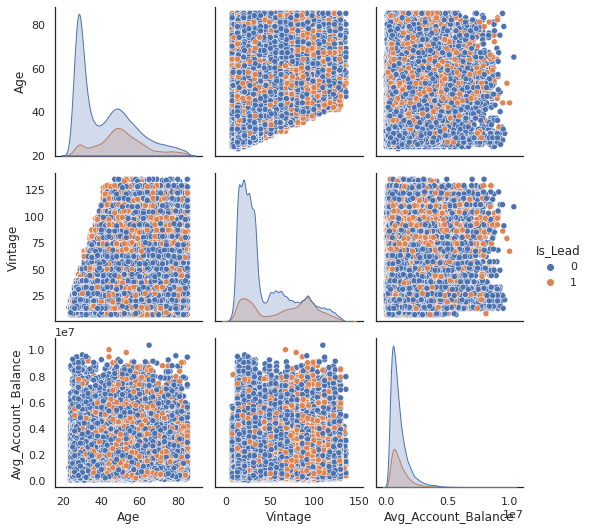

In [484]:
sns.pairplot(train,diag_kind='kde',hue='Is_Lead')

In [86]:
train['Vintage'] = train['Vintage']/12

In [90]:
train.head()
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               1
Vintage                    1
Credit_Product         17798
Avg_Account_Balance        1
Is_Active                  1
Is_Lead                    1
dtype: int64

In [88]:
a = train[train['Credit_Product']=='Yes']
b = train[train['Credit_Product']=='No']

c = train[train.isnull()]

In [89]:
a.head(12)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,4.083333,Yes,2014239.000000,No,0.000000
11,GZ5TMYIR,Male,27,RG270,Self_Employed,X1,1.166667,Yes,502787.000000,No,0.000000
13,KCE7JSFN,Male,31,RG254,Salaried,X1,2.583333,Yes,938754.000000,No,0.000000
16,CNGSPYWS,Female,46,RG268,Other,X3,8.083333,Yes,2282502.000000,No,1.000000
17,VH7NBNNQ,Female,59,RG283,Other,X3,1.250000,Yes,2384692.000000,No,1.000000
20,7PMYNWB3,Male,44,RG269,Self_Employed,X2,1.583333,Yes,1001650.000000,No,1.000000
29,KGLLM5AM,Female,52,RG283,Self_Employed,X3,4.666667,Yes,1056910.000000,Yes,1.000000
33,PQXUNUBE,Male,27,RG279,Salaried,X1,1.750000,Yes,312158.000000,No,0.000000
34,FXPTJYP7,Male,67,RG268,Other,X1,7.250000,Yes,1684182.000000,No,1.000000
37,AGDXY8Y5,Male,59,RG284,Self_Employed,X3,4.583333,Yes,294714.000000,Yes,1.000000
